<a href="https://colab.research.google.com/github/coding-dojo-data-science/machine-learning-practice-solutions/blob/main/KNNSolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<img src="https://course_report_production.s3.amazonaws.com/rich/rich_files/rich_files/2470/s300/cd-logo-blue-600x600.png" alt="Coding Dojo Logo" class="center" height="50">

# KNN Challenge - Solutions
    
</center>

In [1]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# import standard scaler
from sklearn.preprocessing import StandardScaler
# import knn classifier
from sklearn.neighbors import KNeighborsClassifier
# import pipeline creator
from sklearn.pipeline import make_pipeline
# import metrics
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split


In [2]:
# load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
df = pd.read_csv(url, header=None)

In [3]:
# Rename columns
df.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 
              'Viscera_weight', 'Shell_weight', 'Rings'] 

In [4]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

# 1. This dataset is fairly balanced.

In [5]:
# Arrange data into features matrix & target vector
X = df[['Length', 'Diameter', 'Height', 'Whole_weight', 
        'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']]
y = df['Sex']

In [6]:
# Validation Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)


# 2 Scaling data using a pipeline

In [7]:
# make and fit a pipe

knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [8]:
# Predict sex
train_preds = knn_pipe.predict(X_train)
test_preds = knn_pipe.predict(X_test)

In [9]:
# Evaluate default model - this is accuracy
print('Accuracy of Train set', accuracy_score(y_train, train_preds))
print('Accuracy of Test set', accuracy_score(y_test, test_preds))

Accuracy of Train set 0.679757343550447
Accuracy of Test set 0.5473684210526316


# 3. Test accuracy on default mode is 52.59%

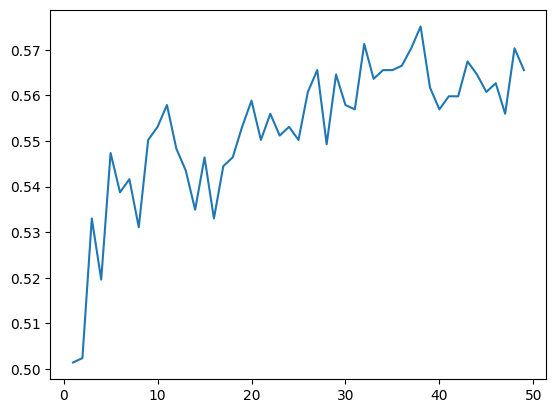

Best K value is 38 
with 0.5751196172248804 accuracy on the test set


In [10]:
krange = range(1, 50)
test_accuracies = []
bestacc = 0
bestk = 0
for k in krange:
  #find accuracy for each k
  pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=k))
  pipe.fit(X_train, y_train)
  acc = accuracy_score(y_test, pipe.predict(X_test))
  #if accuracy for this k is better than previous accuracies, set bestk = k
  if acc > bestacc:
    bestacc = acc
    bestk = k

  test_accuracies.append(acc)

#plot accuracies over K
plt.plot(krange, test_accuracies, label='Test K Scores')
plt.show()

#print best k and best accuracy
print(f'Best K value is {bestk} \nwith {bestacc} accuracy on the test set')

# 4. Optimal accuracy while tuning K is 56.61%

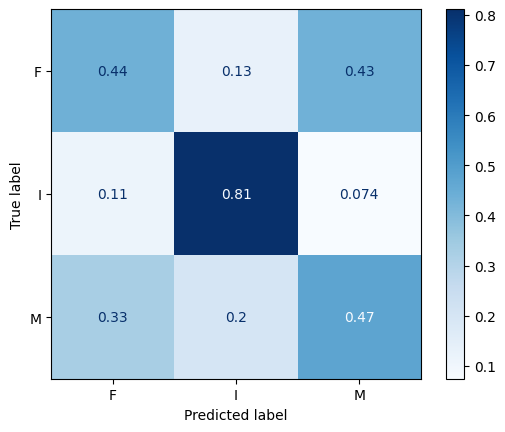

In [11]:
# create new model with best k
knn_final_pipe = make_pipeline(StandardScaler(), 
                               KNeighborsClassifier(n_neighbors = bestk))
knn_final_pipe.fit(X_train, y_train)

# Display confusion matrix for KNN with best k
ConfusionMatrixDisplay.from_estimator(knn_final_pipe, X_test, y_test, 
                                      cmap = 'Blues', normalize='true');

# 5. The confusion matrix shows that this model is pretty good at predicting immature (I) abalones, but less successful at predicting male and female ones.

In [12]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
